In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("train.csv")

df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df['Age'].fillna(df['Age'].median(), inplace=True)

df = pd.get_dummies(df, drop_first=True)

X = df.drop("Survived", axis=1)
y = df["Survived"]

/tmp/ipython-input-2111710993.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Support Vector Machine (SVM)

In [6]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

print("Linear Kernel Accuracy:", acc_linear)

Linear Kernel Accuracy: 0.7821229050279329


RBF Kernel

In [7]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("RBF Kernel Accuracy:", acc_rbf)

RBF Kernel Accuracy: 0.6536312849162011


Comparison

Linear kernel works well when data is roughly linearly separable.

RBF handles non-linear boundaries.

Compare both accuracies and state which performs better.

Decision Tree

In [8]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, tree.predict(X_test)))

Decision Tree Accuracy: 0.7486033519553073


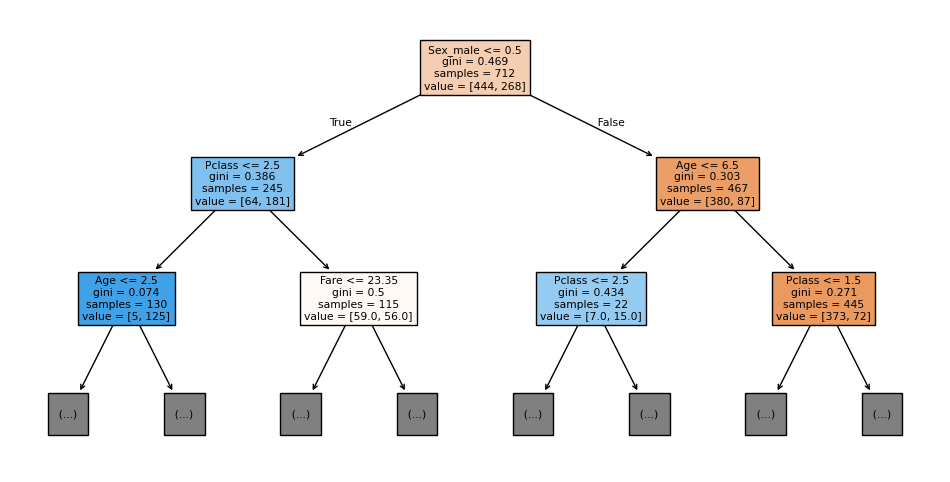

In [9]:
plt.figure(figsize=(12,6))
plot_tree(tree, max_depth=2, feature_names=X.columns, filled=True)
plt.show()

Underfitting (Low Depth)

In [10]:
tree_low = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_low.fit(X_train, y_train)

print("Low Depth Train Accuracy:",
      accuracy_score(y_train, tree_low.predict(X_train)))
print("Low Depth Test Accuracy:",
      accuracy_score(y_test, tree_low.predict(X_test)))

Low Depth Train Accuracy: 0.8033707865168539
Low Depth Test Accuracy: 0.7653631284916201


Overfitting (High Depth)

In [11]:
tree_high = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_high.fit(X_train, y_train)

print("High Depth Train Accuracy:",
      accuracy_score(y_train, tree_high.predict(X_train)))
print("High Depth Test Accuracy:",
      accuracy_score(y_test, tree_high.predict(X_test)))

High Depth Train Accuracy: 0.9775280898876404
High Depth Test Accuracy: 0.7486033519553073


Model Validation

In [12]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

In [14]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
print("Validation Accuracy:",
      accuracy_score(y_val, model.predict(X_val)))

Validation Accuracy: 0.8314606741573034


In [16]:
print("Test Accuracy:",
      accuracy_score(y_test, model.predict(X_test)))

Test Accuracy: 0.7932960893854749


Cross Validation

In [17]:
tree = DecisionTreeClassifier(max_depth=3)
cv_scores = cross_val_score(tree, X, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

Cross Validation Scores: [0.81564246 0.81460674 0.81460674 0.78651685 0.82022472]
Average CV Accuracy: 0.8103195028560668


Ensemble Learning

Bagging:

Trains multiple models independently

Reduces variance

Example: Random Forest

Boosting:

Trains models sequentially

Each new model corrects previous mistakes

Reduces bias

Example: AdaBoost

Bagging Classifier

In [18]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

bag.fit(X_train, y_train)

print("Bagging Accuracy:",
      accuracy_score(y_test, bag.predict(X_test)))

Bagging Accuracy: 0.8044692737430168


AdaBoost

In [19]:
boost = AdaBoostClassifier(
    n_estimators=50,
    random_state=42
)

boost.fit(X_train, y_train)

print("AdaBoost Accuracy:",
      accuracy_score(y_test, boost.predict(X_test)))

AdaBoost Accuracy: 0.7877094972067039


Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Accuracy:",
      accuracy_score(y_test, rf.predict(X_test)))

Random Forest Accuracy: 0.8100558659217877


Decision Tree - overfits

Bagging - better

Random Forest - strongest performer

In [21]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

,0
Fare,0.361432
Age,0.290095
Sex_male,0.243901
Pclass,0.104572


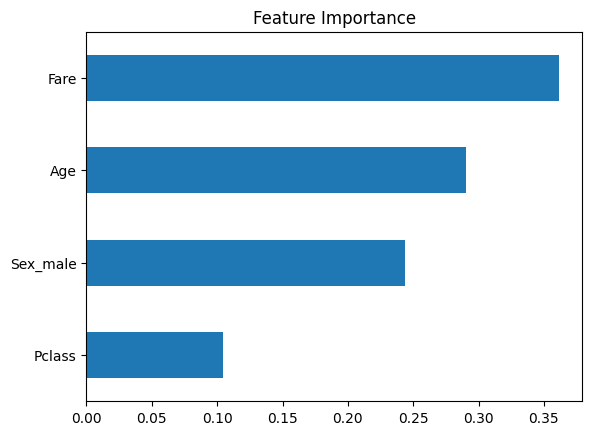

In [22]:
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()